## Back-propagation

**Type of Content:** Documentation

**Domain:** Machine Learning

**Module:** Dimensionality Reduction And Neural Networks

### What is backpropagation?

Backpropagation is a supervised learning algorithm, for training Multi-layer Perceptrons (Artificial Neural Networks).

We can define the backpropagation algorithm as an algorithm that trains some given feed-forward Neural Network for a given input pattern where the classifications are known to us. At the point when every passage of the example set is exhibited to the network, the network looks at its yield reaction to the example input pattern. After that, the comparison done between output response and expected output with the error value is measured. Later, we adjust the connection weight based upon the error value measured.

Neural network training happens through backpropagation. By this approach, we fine-tune the weights of a neural net based on the error rate obtained in the previous run. The right manner of applying this technique reduces error rates and makes the model more reliable. Backpropagation is used to train the neural network of the chain rule method. In simple terms, after each feed-forward passes through a network, this algorithm does the backward pass to adjust the model’s parameters based on weights and biases. A typical supervised learning algorithm attempts to find a function that maps input data to the right output.  Backpropagation works with a multi-layered neural network and learns internal representations of input to output mapping. 

### How does backpropagation work?

It has four layers: input layer, hidden layer, hidden layer II and final output layer.

So, the main three layers are:

1. Input layer
2. Hidden layer
3. Output layer

Each layer has its own way of working and its own way to take action such that we are able to get the desired results and correlate these scenarios to our conditions. 


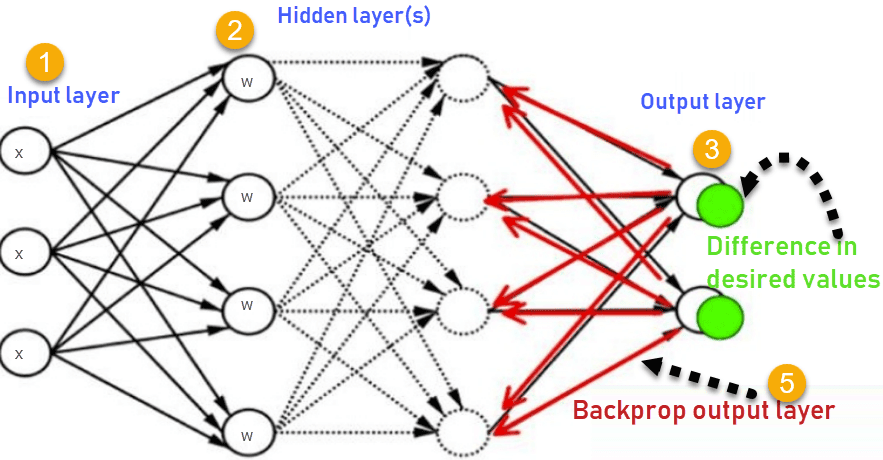

The above image summarizes the functioning of the backpropagation approach.

1. Input layer receives x
2. Input is modeled using weights w
3. Each hidden layer calculates the output and data is ready at the output layer
4. Difference between actual output and desired output is known as the error
5. Go back to the hidden layers and adjust the weights so that this error is reduced in future runs.

Let me summarize the steps for you:

1. **Calculate the error** – How far is your model output from the actual output.
2. **Minimum Error** – Check whether the error is minimized or not.
3. **Update the parameters** – If the error is huge then, update the parameters (weights and biases). After that again check the error. Repeat the process until the error becomes minimum.
4. **Model is ready to make a prediction** – Once the error becomes minimum, you can feed some inputs to your model and it will produce the output.

This process is repeated till we get the desired output. The training phase is done with supervision.  Once the model is stable, it is used in production.

### Loss function

One or more variables are mapped to real numbers, which represent some price related to those values.  Intended for backpropagation, the loss function calculates the difference between the network output and its probable output.

### Backpropagation Algorithm:

initialize network weights (often small random values)

  **do**

     forEach training example named ex

        prediction = neural-net-output(network, ex)  // forward pass

        actual = teacher-output(ex)

        compute error (prediction - actual) at the output units

        compute {displaystyle Delta w_{h}} for all weights from hidden layer to output layer  // backward pass

        compute {displaystyle Delta w_{i}} for all weights from input layer to hidden layer   // backward pass continued

        update network weights // input layer not modified by error estimate

 **until** all examples classified correctly or another stopping criterion satisfied

  **return** the network

### Implementation

BPN learns in an iterative manner. In each iteration, it compares training examples with the actual target label. target label can be a class label or continuous value. The backpropagation algorithm works in the following steps:

1. **Initialize Network:** BPN randomly initializes the weights. 
2. **Forward Propagate:** After initialization, we will propagate into the forward direction. In this phase, we will compute the output and calculate the error from the target output.
3. **Back Propagate Error:** For each observation, weights are modified in order to reduce the error in a technique called the delta rule or gradient descent. It modifies weights in a “backward” direction to all the hidden layers

In [6]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
# Load dataset
data = load_iris()

# Get features and target
X=data.data
y=data.target

**Prepare Dataset:**

Create dummy variables for class labels using get_dummies() function

In [8]:
# Get dummy variable 
y = pd.get_dummies(y).values
y[:3]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [9]:
#Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)

**Initialize Hyperparameters and Weights:**

Lets initialize the hyperparameters such as learning rate, iterations, input size, number of hidden layers, and number of output layers.

In [10]:
# Initialize variables
learning_rate = 0.1
iterations = 5000
N = y_train.size

# number of input features
input_size = 4

# number of hidden layers neurons
hidden_size = 2 

# number of neurons at the output layer
output_size = 3  

results = pd.DataFrame(columns=["mse", "accuracy"])

In [11]:
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

**Backpropagation Neural Network:**

In this phase, we will create backpropagation neural network in three steps feedforward propagation, error calculation and backpropagation phase. Here , we will create a for loop for given number of iterations that execute the three steps(feedforward propagation, error calculation and backpropagation phase) and update the weights in each iteration.

In [15]:
for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    
    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

**Predict for Test Data and Evaluate the Performance:**

Lets make prediction for the test data and assess the performance of Backpropagation neural network.

In [16]:
# feedforward
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.8


**You can see in the above output, we are getting 80% accuracy on test dataset.** In this way you can implement backpropogation algorithm.

### Advantages of backpropagation

Backpropagation has many advantages, some of the important ones are listed below-

1. Backpropagation is fast, simple and easy to implement.
2. There are no parameters to be tuned.
3. Prior knowledge about the network is not needed thus becoming a flexible method.
4. This approach works very well in most cases.
5. The model need not learn the features of the function.

### Disadvantages of backpropagation

1. Input data holds the key to the overall performance
2. Noisy data can lead to inaccurate results
3. Matrix based approach is preferred over a mini-batch

### Conclusion

Neural network is a collection of connected units with input and output mechanism, each of the connections has an associated weight. Backpropagation is the “backward propagation of errors” and is useful to train neural networks. It is fast, easy to implement and simple. Backpropagation is very beneficial for deep neural networks working over error prone projects like speech or image recognition.

**References:**
1. https://medium.com/@17bit030/back-propagation-from-scratch-24d9edef5abd
2. https://www.edureka.co/blog/backpropagation/